In [2]:
import keras
from keras import layers

from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [4]:
input = keras.Input(shape=(28, 28, 1))

encoded=layers.Conv2D(16, (3,3), padding='same', activation='relu')(input)
encoded=layers.MaxPool2D(padding='same')(encoded)
encoded=layers.Conv2D(8, (3,3), padding='same', activation='relu')(encoded)
encoded=layers.MaxPool2D(padding='same')(encoded)

decoded=layers.Conv2D(8, (3,3), padding='same', activation='relu')(encoded)
decoded=layers.UpSampling2D()(decoded)
decoded=layers.Conv2D(16, (3,3), padding='same', activation='relu')(decoded)
decoded=layers.UpSampling2D()(decoded)
decoded=layers.Conv2D(1, (3,3), padding='same', activation='sigmoid')(decoded)


autoencoder=keras.Model(input, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
(x_train,_), (x_test,_) = mnist.load_data()

x_train.shape

(60000, 28, 28)

In [11]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)


In [12]:
autoencoder.fit(x_train, x_train, batch_size=256, epochs=50, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 32s 121ms/step - loss: 4.7666e-10 - val_loss: 4.8342e-10
Epoch 2/50
235/235 [==============================] - 28s 119ms/step - loss: 4.7666e-10 - val_loss: 4.8342e-10
Epoch 3/50
235/235 [==============================] - 29s 122ms/step - loss: 4.7666e-10 - val_loss: 4.8342e-10
Epoch 4/50
235/235 [==============================] - 29s 123ms/step - loss: 4.7666e-10 - val_loss: 4.8342e-10
Epoch 5/50
235/235 [==============================] - 35s 149ms/step - loss: 4.7666e-10 - val_loss: 4.8342e-10
Epoch 6/50
235/235 [==============================] - 51s 216ms/step - loss: 4.7666e-10 - val_loss: 4.8342e-10
Epoch 7/50
235/235 [==============================] - 64s 274ms/step - loss: 4.7666e-10 - val_loss: 4.8342e-10
Epoch 8/50
235/235 [==============================] - 73s 309ms/step - loss: 4.7666e-10 - val_loss: 4.8342e-10
Epoch 9/50
235/235 [==============================] - 71s 301ms/step - loss: 4.7666e-10 - val_loss: 4.8342e-10
E

In [13]:
decoded_images = autoencoder.predict(x_test)

313/313 [==============================] - 3s 5ms/step


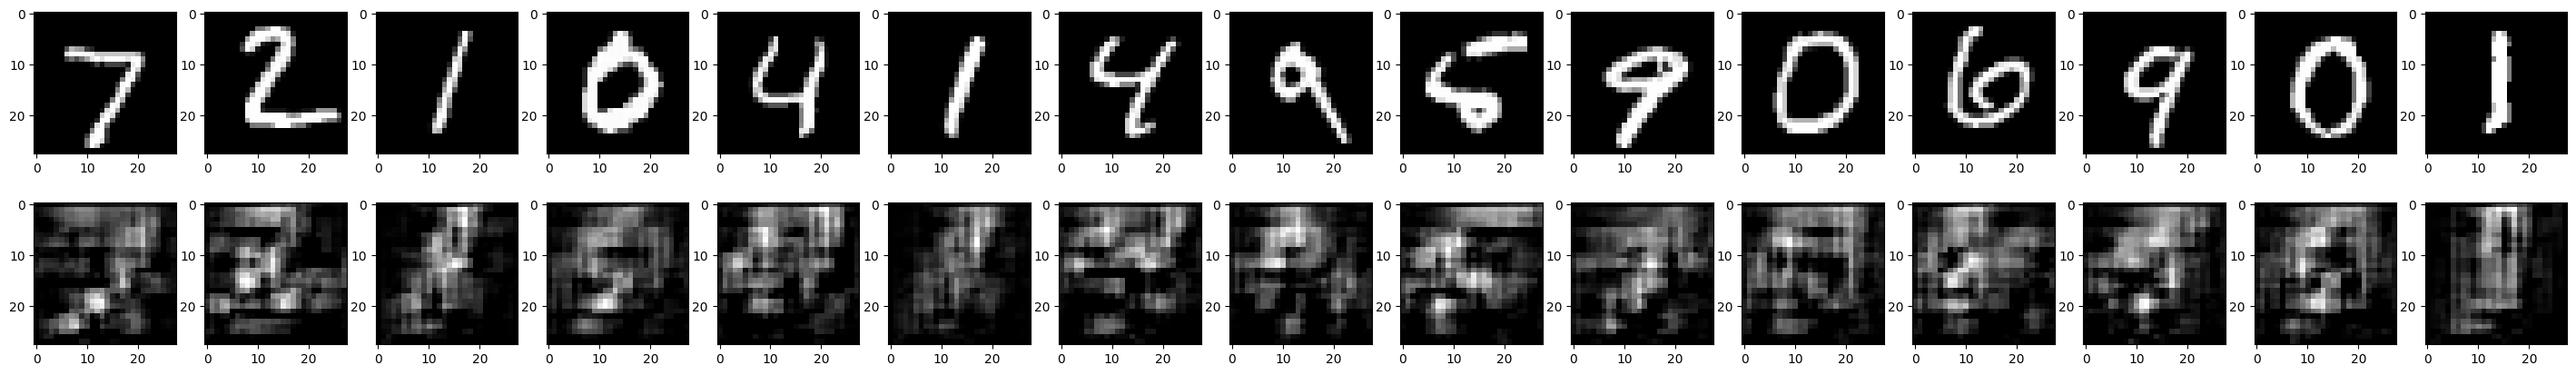

In [14]:
n=15
plt.figure(figsize=(36, 5))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
plt.show()